# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [1]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

In [2]:
reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

# Run Light Curve Fits
___
## Individual SNe
First test

In [3]:
snname = "SN2006aj"
pcc.functions.test_LCfit(snname)

/Users/berto/Code/CoCo/
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/SN2006aj.stat
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/SN2006aj.dat


True

Then run

In [11]:
pcc.functions.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat']
Fit complete


In [12]:
pcc.functions.test_LCfit(snname)

/Users/berto/Code/CoCo/
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/SN2006aj.stat
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/SN2006aj.dat


True

<IPython.core.display.Javascript object>


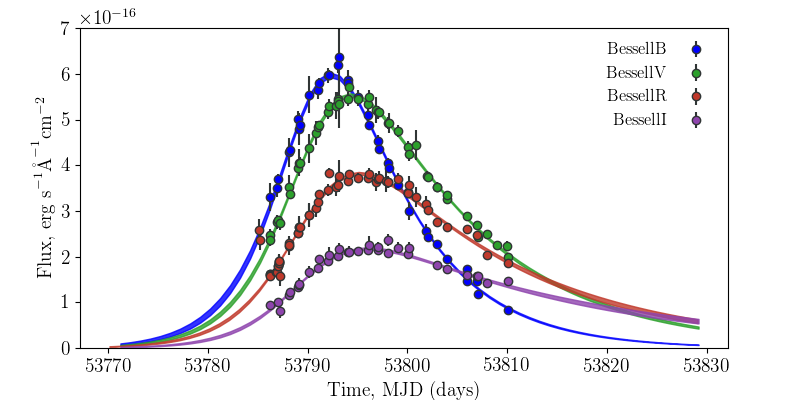

In [13]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [7]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

array(['Bazin09', 'Firth17Complex', 'Karpenka12', 'Karpenka12Afterglow',
       'Kessler10', 'LinearMangle', 'SpecMangle'], 
      dtype='<U19')

In [17]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.functions.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

current list.txt is up to date. re run with force = True to force.
running with Karpenka12
Running CoCo lcfit on /Users/berto/Code/CoCo/data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat', '-m', 'Karpenka12']
Fit complete


<IPython.core.display.Javascript object>


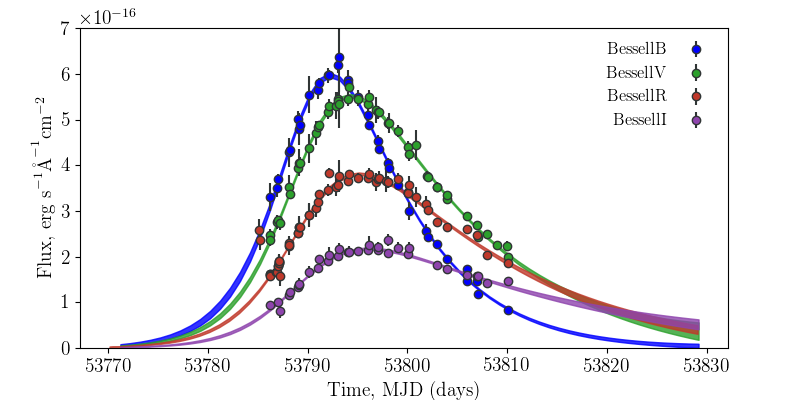

In [18]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [ ]:
pcc.functions.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

In [ ]:
reload(pcc) ## FOR DEV
reload(pcc.classes)
reload(pcc.defaults) ## FOR DEV

## Call Specfit
---

### individual speclists

In [ ]:
pcc.functions.get_all_spec_lists()

In [ ]:
# pcc.functions.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.functions.run_specfit('/Users/berto/Code/CoCo/lists/iPTF13bvn.list')

## All Speclists
___

In [ ]:
pcc.functions.specfit_all()

# Specphase

In [ ]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.functions.run_specphase("BessellV", phase_path)

In [ ]:
pcc.utils